<a href="https://colab.research.google.com/github/MinJi12345678/Source-Code/blob/main/24_03_27_%EA%B9%80%EB%AF%BC%EC%A7%80_EDA_%EA%B0%80%EC%9D%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2023년 가을 패션 EDA

한글 폰트 설치

In [1]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 전역폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import warnings
warnings.filterwarnings('ignore')

데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = '/content/drive/MyDrive/5조/03. 데이터/2차 전처리 패션 데이터/Fashion_Weather_Data.csv'
df = pd.read_csv(df)

.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565954 entries, 0 to 565953
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Time                  565954 non-null  object 
 1   category_middle_desc  565954 non-null  object 
 2   category_small_desc   565954 non-null  object 
 3   item                  565954 non-null  object 
 4   color                 565954 non-null  object 
 5   material              565954 non-null  object 
 6   sale_price            565954 non-null  int64  
 7   recent_sale_count     565954 non-null  int64  
 8   최고기온                  565954 non-null  float64
 9   최저기온                  565954 non-null  float64
 10  평균기온                  565954 non-null  float64
 11  강수량                   565954 non-null  float64
 12  습도                    565954 non-null  float64
 13  적설                    565954 non-null  float64
 14  체감온도                  565954 non-null  float64
dtype

데이터 복사

In [6]:
season_df = df.copy()

#1. 상관계수

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
correlation_matrix = season_df.corr()

print(correlation_matrix['recent_sale_count'])

sale_price          -0.049340
recent_sale_count    1.000000
최고기온                 0.006947
최저기온                 0.003255
평균기온                 0.004506
강수량                  0.000747
습도                  -0.009469
적설                  -0.016434
체감온도                 0.004481
Name: recent_sale_count, dtype: float64


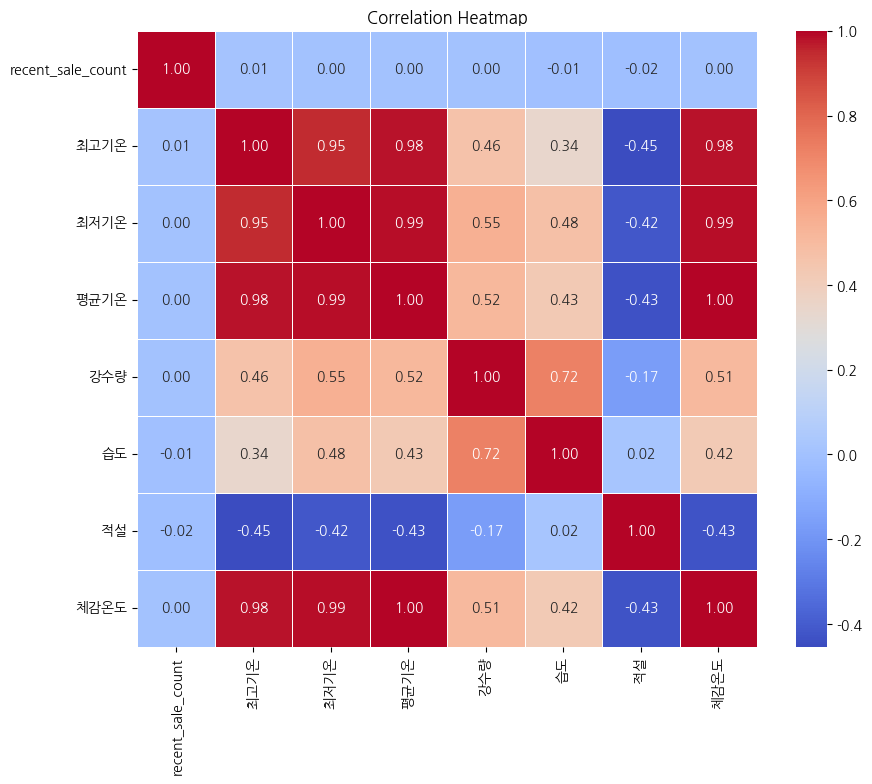

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.iloc[1:,1:], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

시계열 데이터로 변환

In [10]:
season_df['Time'] = pd.to_datetime(season_df['Time'])

season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565954 entries, 0 to 565953
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Time                  565954 non-null  datetime64[ns]
 1   category_middle_desc  565954 non-null  object        
 2   category_small_desc   565954 non-null  object        
 3   item                  565954 non-null  object        
 4   color                 565954 non-null  object        
 5   material              565954 non-null  object        
 6   sale_price            565954 non-null  int64         
 7   recent_sale_count     565954 non-null  int64         
 8   최고기온                  565954 non-null  float64       
 9   최저기온                  565954 non-null  float64       
 10  평균기온                  565954 non-null  float64       
 11  강수량                   565954 non-null  float64       
 12  습도                    565954 non-null  float64       
 13 

In [11]:
season_df.set_index('Time', inplace=True)

가을 데이터

In [12]:
fall_df = season_df['2023-09-01':'2023-11-30']

fall_df

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-09-06,원피스,롱원피스,맥시원피스/롱원피스/바캉스룩원피스/리넨원피스/어깨끈원피스/여름원피스/리넨나시/나시원...,블랙/베이지,실크/리넨/레이온,33900,1,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,도트원피스/맥시원피스/롱원피스,블랙/화이트,폴리에스터,107640,5,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,블랙,폴리에스터,123240,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,블랙/네이비/베이지/화이트,폴리에스터,59400,12,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,블랙/베이지/아이보리/브라운,폴리에스터,62900,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,스커트,플레어스커트,하객룩스커트/미니스커트,아이보리/블랙,폴리에스터,19920,2,12.4,-7.1,0.41,0.0,55.93,0.0,0.84
2023-11-29,스커트,H라인스커트,코듀로이스커트,핑크/라이트블루/블랙/화이트/그린/아이보리,코튼,29900,5,12.4,-7.1,0.41,0.0,55.93,0.0,0.84
2023-11-29,스커트,H라인스커트,미니스커트/코듀로이스커트/데일리스커트/겨울스커트/울스커트,핑크/그린/차콜/아이보리/블루,코튼,27900,1,12.4,-7.1,0.41,0.0,55.93,0.0,0.84


23년 데이터 전체

In [13]:
season_df_23 = season_df['2023-01-01':'2023-12-31']

season_df_23

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,베이식원피스/하객룩원피스/겨울원피스/울원피스,블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,스커트,롱스커트,겨울스커트/데일리스커트/울스커트/플리츠스커트/메탈릭스커트/롱스커트,실버/블랙,스판/폴리에스터,57600,1,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51
2023-12-20,스커트,플리츠스커트,겨울스커트/울스커트/플리츠스커트/미니스커트/기모스커트,카키/베이지/블랙,기모/코튼,28800,1,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51
2023-12-20,스커트,플레어스커트,베이식스커트/A라인스커트/울스커트/속바지스커트/A라인치마바지/미니스커트/치마바지/리넨팬츠,레드,폴리에스터/울,51000,2,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51


#23년 탐색적 데이터 분석

##1. 23년 의류별 판매량

###1) month 추가

In [14]:
season_df_23['month'] = season_df_23.index.month

season_df_23.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도,month
Time,,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,베이식원피스/하객룩원피스/겨울원피스/울원피스,블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1


###2)의류별 중분류 월별 판매량

In [15]:
df_pivot = pd.pivot_table(season_df_23,
           index = ['category_middle_desc'],
           values = ['recent_sale_count'],
           columns = ['month'],
           aggfunc = 'sum',
           fill_value = 0)

df_pivot.sort_values(by=df_pivot.columns[0],
                     ascending=False,
                     inplace=True)
df_pivot

recent_sale_count                                      \
month                               1      2       3      4      5      6    
category_middle_desc                                                         
상의                               48367  63207  133912  49636  21740  62375   
아우터                              15106  23784   54160  16138   6363   2937   
원피스                              10951  14223   30934  14970   6326  31077   
팬츠                               10259  12154   38980  12989   5738  23743   
스커트                               9126  12598   23860   9255   2775   8676   
세트/투피스                               0      0       0      0      0     51   

                                                                
month                    7      8      9      10     11     12  
category_middle_desc                                            
상의                    72532  59850  67826  56583  65173  34627  
아우터                    2779   4325   8872  10960  16175   6945  
원피스                   40133  28521  18049  11505  13833   8332  
팬츠                    29758  20493  22113  19062  38677  24892  
스커트                   11347  11143  15970  12186  18892  11132  
세트/투피스                  154    137    135    134    117     67

###3) 막대 그래프

<Figure size 1500x1000 with 0 Axes>

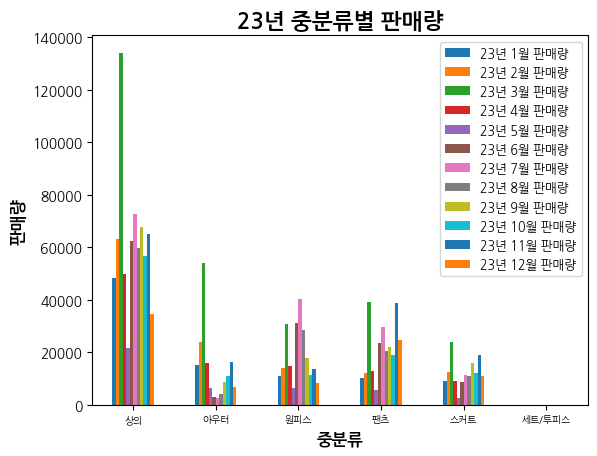

In [16]:
plt.figure(figsize = (15, 10))
df_pivot.plot(kind='bar')
plt.title('23년 중분류별 판매량', fontsize = 16, fontweight='bold')
plt.xlabel('중분류', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.legend(['23년 1월 판매량', '23년 2월 판매량', '23년 3월 판매량', '23년 4월 판매량', '23년 5월 판매량', '23년 6월 판매량', '23년 7월 판매량', '23년 8월 판매량', '23년 9월 판매량', '23년 10월 판매량', '23년 11월 판매량', '23년 12월 판매량'], fontsize = 9)
plt.xticks(fontsize=7,
           rotation = 0)
plt.show()

###4) 원형 그래프

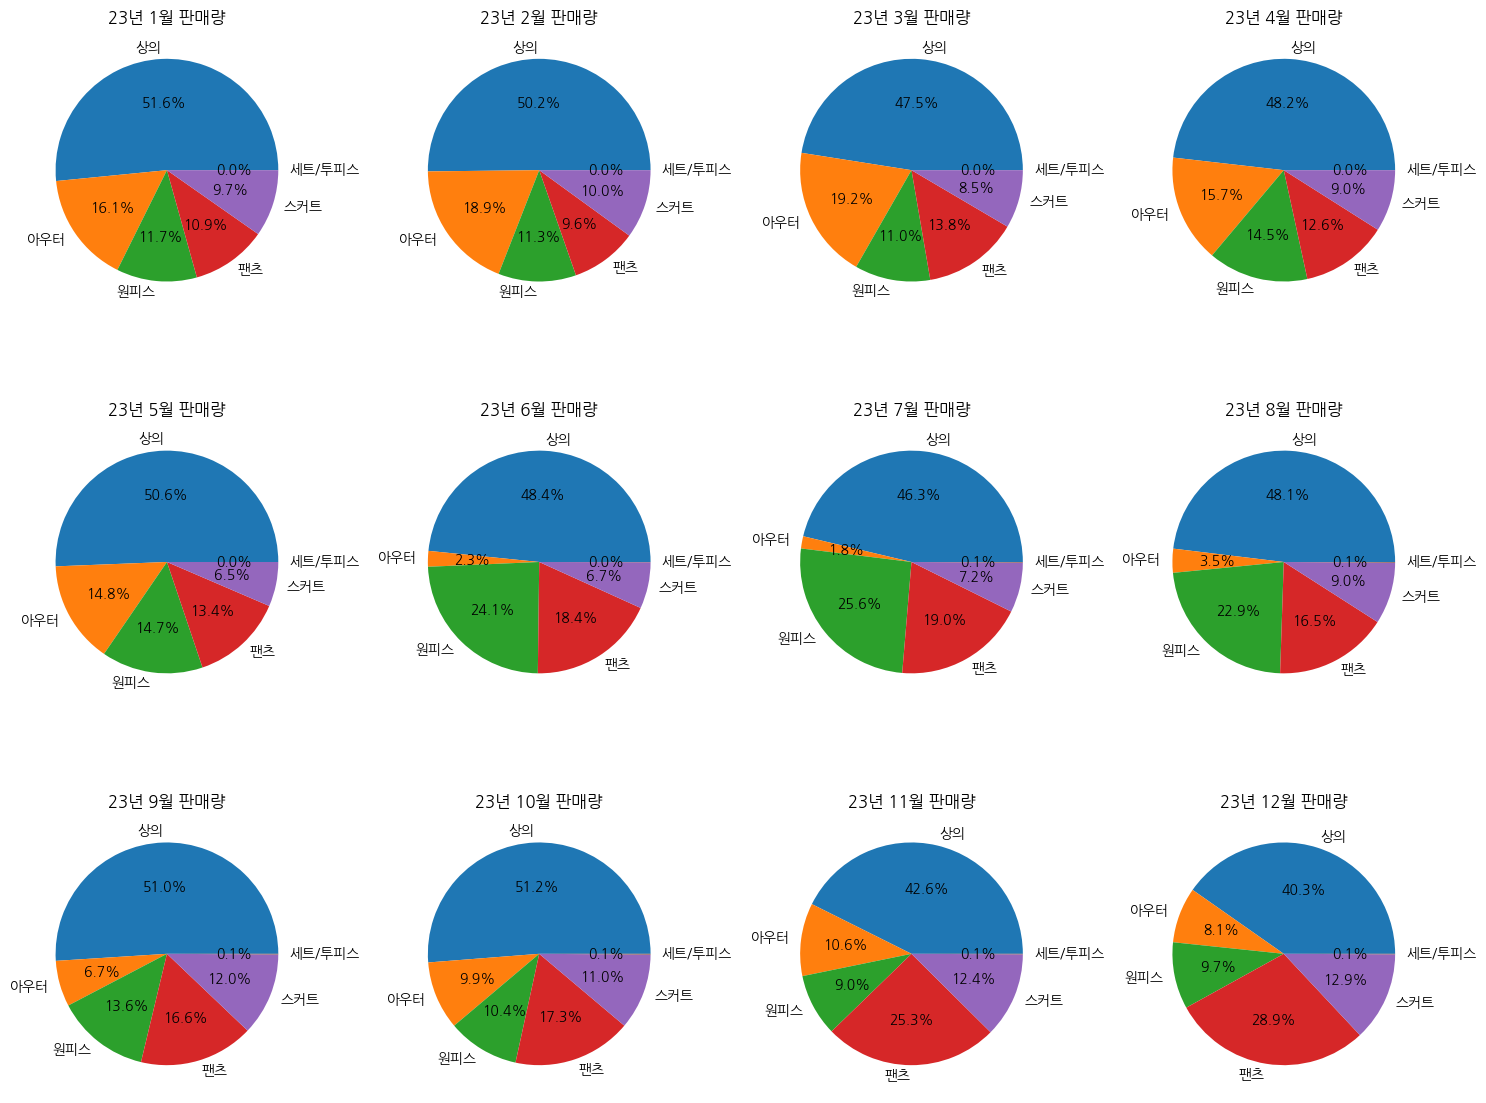

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

for idx, (month, pivot) in enumerate(df_pivot.items()):
    row = idx // 4
    col = idx % 4

    data = pivot.values.flatten()  # 해당 월의 데이터
    labels = pivot.index  # 카테고리 이름
    axes[row, col].pie(data, labels=labels, autopct='%1.1f%%')
    axes[row, col].set_title(f'23년 {idx+1}월 판매량')

plt.tight_layout()
plt.show()

###5) 네트워크 그래프

중분류 월별 판매량

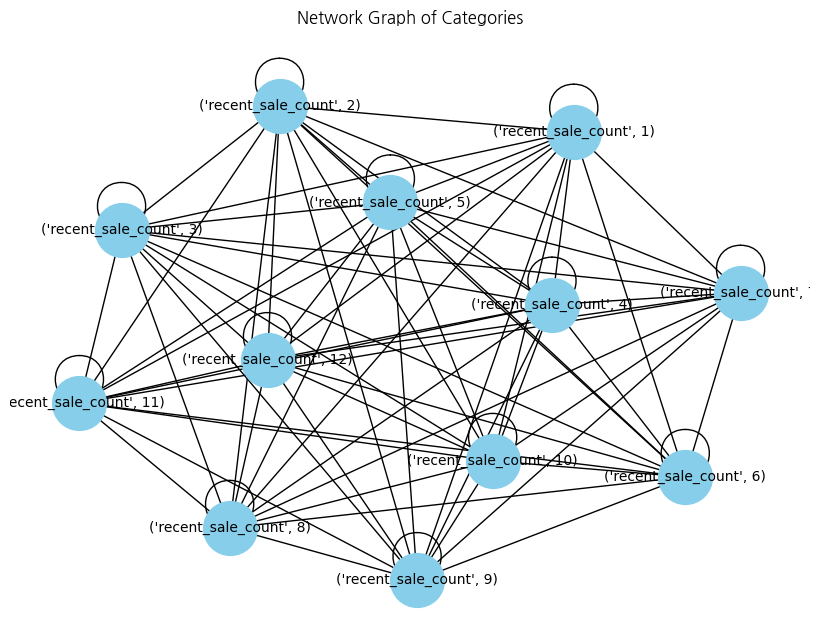

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
# 네트워크 그래프 생성
G = nx.from_pandas_adjacency(df_pivot.corr())
node_labels = {node: node for node in G.nodes()}
# 그래프 시각화
plt.figure(figsize=(8, 6))
nx.draw(G, labels=node_labels, node_color='skyblue', node_size=1500, font_size=10, font_color='black')
plt.title('Network Graph of Categories')
plt.show()

23년 의류별 판매량

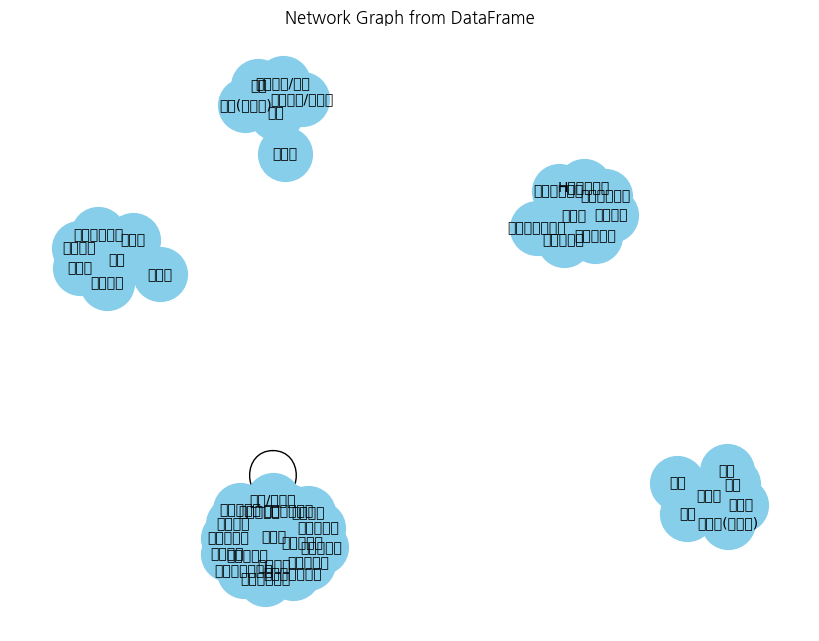

In [47]:
# 엣지 리스트 생성
edges = season_df[['recent_sale_count', 'category_small_desc', 'category_middle_desc']]
# 네트워크 그래프 생성
G = nx.from_pandas_edgelist(edges, 'category_middle_desc', 'category_small_desc', ['recent_sale_count'])
nodes = df['category_middle_desc'].unique()
G.add_nodes_from(nodes)
# 네트워크 그래프 시각화
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_color='black')
plt.title('Network Graph from DataFrame')
plt.show()

##2. 23년 가을 의류별 판매량

###1) month 추가

In [18]:
fall_df['month'] = fall_df.index.month

fall_df.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도,month
Time,,,,,,,,,,,,,,,
2023-09-06,원피스,롱원피스,맥시원피스/롱원피스/바캉스룩원피스/리넨원피스/어깨끈원피스/여름원피스/리넨나시/나시원...,블랙/베이지,실크/리넨/레이온,33900,1,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,도트원피스/맥시원피스/롱원피스,블랙/화이트,폴리에스터,107640,5,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,블랙,폴리에스터,123240,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,블랙/네이비/베이지/화이트,폴리에스터,59400,12,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,블랙/베이지/아이보리/브라운,폴리에스터,62900,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9


###2)의류별 중분류 월별 판매량

In [19]:
df_pivot_fall = pd.pivot_table(fall_df,
           index = ['category_middle_desc'],
           values = ['recent_sale_count'],
           columns = ['month'],
           aggfunc = 'sum',
           fill_value = 0)

df_pivot_fall.sort_values(by=df_pivot_fall.columns[0],
                     ascending=False,
                     inplace=True)
df_pivot_fall

recent_sale_count              
month                               9      10     11
category_middle_desc                                
상의                               67826  56583  65173
팬츠                               22113  19062  38677
원피스                              18049  11505  13833
스커트                              15970  12186  18892
아우터                               8872  10960  16175
세트/투피스                             135    134    117

###3) 막대그래프

<Figure size 1500x1000 with 0 Axes>

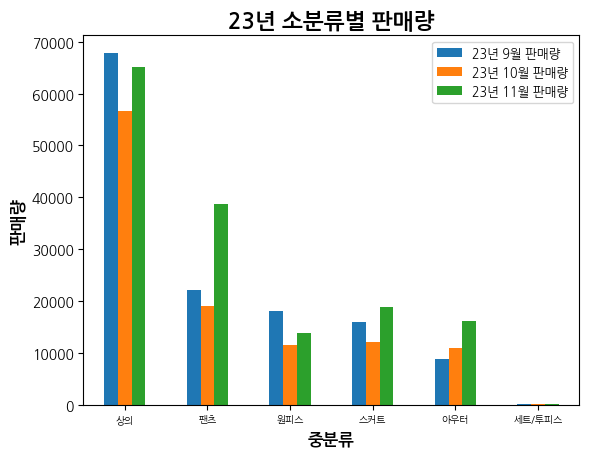

In [20]:
plt.figure(figsize = (15, 10))
df_pivot_fall.plot(kind='bar')
plt.title('23년 소분류별 판매량', fontsize = 16, fontweight='bold')
plt.xlabel('중분류', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.legend(['23년 9월 판매량', '23년 10월 판매량', '23년 11월 판매량'], fontsize = 9)
plt.xticks(fontsize=7,
           rotation = 0)
plt.show()

##2. 의류별 아이템 키워드

###1) 가을 의류 키워드 분류

In [21]:
fall_df['item'] = fall_df['item'] + ','

fall_df.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도,month
Time,,,,,,,,,,,,,,,
2023-09-06,원피스,롱원피스,맥시원피스/롱원피스/바캉스룩원피스/리넨원피스/어깨끈원피스/여름원피스/리넨나시/나시원...,블랙/베이지,실크/리넨/레이온,33900,1,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,"도트원피스/맥시원피스/롱원피스,",블랙/화이트,폴리에스터,107640,5,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,"맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,",블랙,폴리에스터,123240,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,"피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,",블랙/네이비/베이지/화이트,폴리에스터,59400,12,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9
2023-09-06,원피스,롱원피스,"빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,",블랙/베이지/아이보리/브라운,폴리에스터,62900,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16,9


In [22]:
fall_df['item'] = fall_df['item'] * fall_df['recent_sale_count']

In [23]:
fall_df_item = fall_df['item'].unique().tolist()

fall_df_item = str(fall_df_item)

In [24]:
print(fall_df_item[:1000])
print(len(fall_df_item))

['맥시원피스/롱원피스/바캉스룩원피스/리넨원피스/어깨끈원피스/여름원피스/리넨나시/나시원피스/루즈핏원피스,', '도트원피스/맥시원피스/롱원피스,도트원피스/맥시원피스/롱원피스,도트원피스/맥시원피스/롱원피스,도트원피스/맥시원피스/롱원피스,도트원피스/맥시원피스/롱원피스,', '맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,', '피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,', '빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,', '피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,피로연원

In [25]:
fall_df_item = fall_df_item.replace("'", ",").replace(" ", ",").replace("/", ",")

In [26]:
import re
fall_df_item = re.sub("[\d\\-\.\[\](nan)]", "", fall_df_item)

In [27]:
fall_df_item = re.sub(",{2,}", ",", fall_df_item)

In [28]:
fall_df_item[:1000]

',맥시원피스,롱원피스,바캉스룩원피스,리넨원피스,어깨끈원피스,여름원피스,리넨나시,나시원피스,루즈핏원피스,도트원피스,맥시원피스,롱원피스,도트원피스,맥시원피스,롱원피스,도트원피스,맥시원피스,롱원피스,도트원피스,맥시원피스,롱원피스,도트원피스,맥시원피스,롱원피스,맥시원피스,플리츠원피스,롱원피스,봄원피스,여름원피스,맥시원피스,플리츠원피스,롱원피스,봄원피스,여름원피스,맥시원피스,플리츠원피스,롱원피스,봄원피스,여름원피스,맥시원피스,플리츠원피스,롱원피스,봄원피스,여름원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,빅사이즈원피스,셔츠롱원피스,롱원피스,하객룩원피스,정장원피스,빅사이즈원피스,셔츠롱원피스,롱원피스,하객룩원피스,정장원피스,빅사이즈원피스,셔츠롱원피스,롱원피스,하객룩원피스,정장원피스,빅사이즈원피스,셔츠롱원피스,롱원피스,하객룩원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피스,하객룩원피스,여름원피스,정장원피스,피로연원피스,롱원피스,베이비돌원피스,칼라원피

In [29]:
fall_df_item_count = pd.Series(fall_df_item.split(',')).value_counts()

In [30]:
fall_df_item_count

맨투맨          32929
와이드팬츠        24874
베이식후드집업      24729
롱스커트         24587
롱원피스         20038
             ...  
반팔폴로셔츠           1
나들이블라우스          1
에스닉자수블라우스        1
쓰리버튼재킷           1
슬림롱카디건           1
Length: 2363, dtype: int64

In [31]:
fall_df_item_count = pd.DataFrame(fall_df_item_count)

In [32]:
fall_df_item_count

,0
맨투맨,32929
와이드팬츠,24874
베이식후드집업,24729
롱스커트,24587
롱원피스,20038
...,...
반팔폴로셔츠,1
나들이블라우스,1
에스닉자수블라우스,1
쓰리버튼재킷,1


###2)워드 클라우드

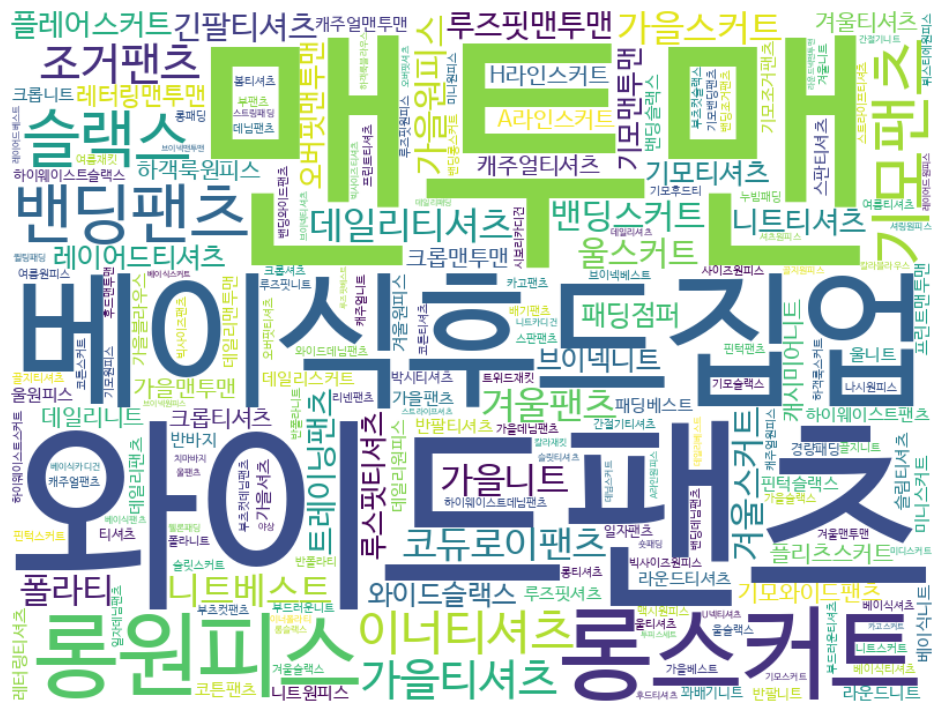

In [33]:
from wordcloud import WordCloud

korean_font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path = korean_font_path,
               background_color = 'white',
               width = 800,
               height = 600)

frequencies = fall_df_item_count[0]

wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize = (14, 9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

##3. 의류별 색상 키워드

###1)가을 의류 색상 분류

In [34]:
fall_df['color'] = fall_df['color'] + ','

In [35]:
fall_df['color'] = fall_df['color'] * fall_df['recent_sale_count']

In [36]:
fall_df_color = fall_df['color'].unique().tolist()

fall_df_color = str(fall_df_color)

In [37]:
fall_df_color = fall_df_color.replace("'", ",").replace(" ", ",").replace("/", ",")
fall_df_color = re.sub("[\d\\-\.\[\](nan)]", "", fall_df_color)
fall_df_color = re.sub(",{2,}", ",", fall_df_color)

In [38]:
fall_df_color_count = pd.Series(fall_df_color.split(',')).value_counts()
fall_df_color_count = pd.DataFrame(fall_df_color_count)
fall_df_color_count

,0
블랙,183703
아이보리,132653
베이지,125552
그레이,87773
핑크,77604
브라운,71055
화이트,68538
차콜,53828
라이트블루,48410
네이비,45199


###2) 막대 그래프

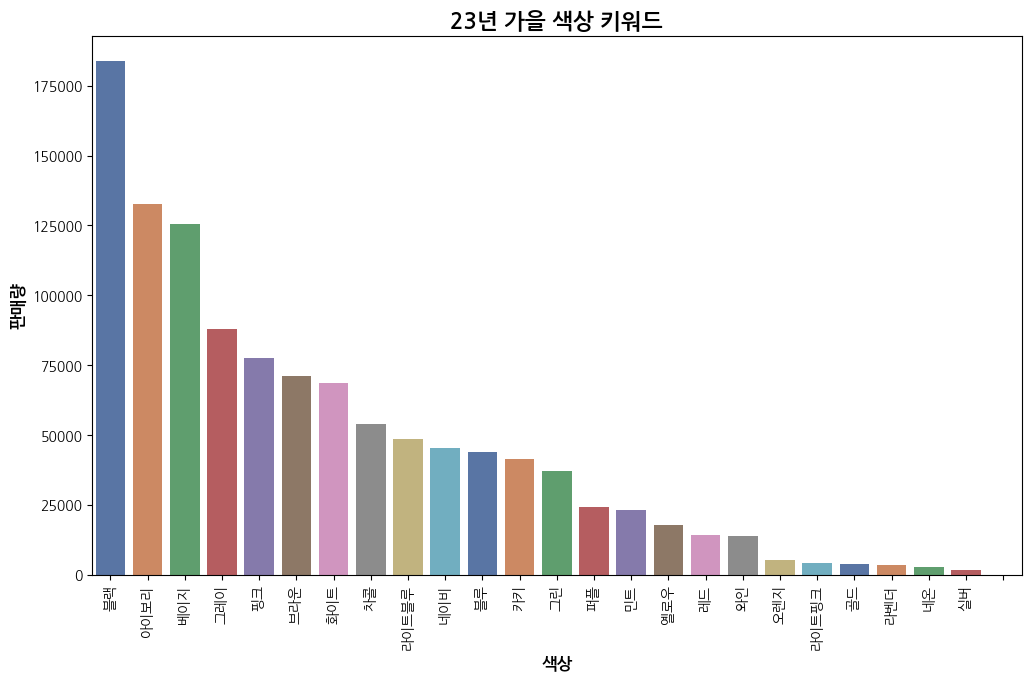

In [39]:
plt.figure(figsize = (12, 7))
sns.barplot(data=fall_df_color_count,
            x = fall_df_color_count.index,
            y = fall_df_color_count[0],
            palette = 'deep')
plt.title('23년 가을 색상 키워드', fontsize = 16, fontweight = 'bold')
plt.xlabel('색상', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

##4. 의류별 재질 키워드

###1) 가을 의류 재질 분류

In [40]:
fall_df['material'] = fall_df['material'] + ','

fall_df['material'] = fall_df['material'] * fall_df['recent_sale_count']

In [41]:
fall_df_material = fall_df['material'].unique().tolist()

fall_df_material = str(fall_df_material)

In [42]:
fall_df_material = fall_df_material.replace("'", ",").replace(" ", ",").replace("/", ",")
fall_df_material = re.sub("[\d\\-\.\[\](nan)]", "", fall_df_material)
fall_df_material = re.sub(",{2,}", ",", fall_df_material)

In [43]:
fall_df_material_count = pd.Series(fall_df_material.split(',')).value_counts()
fall_df_material_count = pd.DataFrame(fall_df_material_count)
fall_df_material_count

,0
폴리에스터,69144
스판,47978
코튼,35321
레이온,28552
실크,24000
울,19427
아크릴,14607
기모,12002
나일론,11675
코듀로이,7649


###2) 막대 그래프

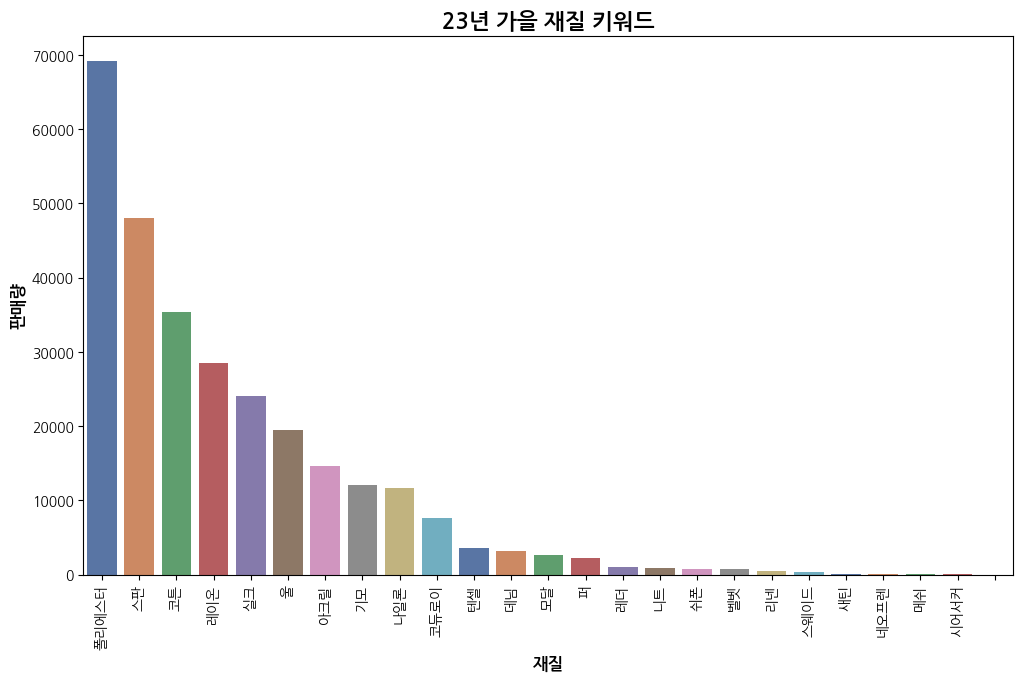

In [44]:
plt.figure(figsize = (12, 7))
sns.barplot(data=fall_df_material_count,
            x = fall_df_material_count.index,
            y = fall_df_material_count[0],
            palette = 'deep')
plt.title('23년 가을 재질 키워드', fontsize = 16, fontweight = 'bold')
plt.xlabel('재질', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()